## PyTorch

In [20]:
import torch
import torchvision
from torchvision import transforms, datasets

In [21]:
train = datasets.MNIST("", train = True, download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train = False, download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))

100.1%

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


113.5%

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


100.4%

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


180.4%

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [23]:
trainset = torch.utils.data.DataLoader(train, batch_size = 64, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size = 64, shuffle=True)

In [26]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [27]:
x, y = data[0][0], data[1][0]

print(y)

tensor(1)


In [29]:
import matplotlib.pyplot as plt

In [30]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


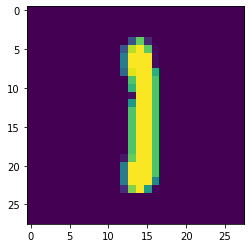

In [31]:
plt.imshow(data[0][0].view(28,28))

In [44]:
total = 0
counter_dict = {x:0 for x in range(10)}

In [45]:
counter_dict

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [46]:
for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [47]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [48]:
import torch.nn as nn
import torch.nn.functional as F

In [49]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [52]:
X = torch.rand((28,28))
X = X.view(-1,28*28)

In [53]:
output = net(X)

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3
for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data